In [77]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
#load the data and investgate it
data = pd.read_csv("C:\\Users\\DELL\\Downloads\\marketing_campaign.csv",sep='\t')

#get the number of rows and columns 
print(f"The number of rows : {data.shape[0]} and the number of columns : {data.shape[1]}")

pd.set_option("display.max_columns",None)

data.head()

The number of rows : 2240 and the number of columns : 29


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [7]:
#info on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
1)There are missing values in income column
2) Dt_Customer indicated the date a customer joined the database is not set as DateTime
3) There are two categorical features in the data, thus we need to encode them into numeric forms before modeling.

In [ ]:
# Data Cleaning
* cleaning the data is to remove missing values and inconsistances 
* Removing rows with missing values

Here we have two options:
1) Replace the missing values with their respect column 
average or median
2) Drop the rows having a missing value

The column Income has 24 missing values, representing only 1% of the total. I believe we can drop them without any impact on the analysis.

In [11]:
# to remove the N/A values
data_cleaned = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data_cleaned))

The total number of data-points after removing the rows with missing values are: 2216


In [18]:
# EXPLORING THE CATEGORICAL FEATURES
print("Total categories in the feature Marital_Status  :\n", data_cleaned["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data_cleaned["Education"].value_counts())

Total categories in the feature Marital_Status  :
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In [20]:
# dealing with the outliers
#use describe built in method in pandas
data_cleaned.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
 *The column Income has an extreme value (666666) that can be considered an outlier, too far from the average and median. 
Therefore, we can drop this row.
*The column Year_Birth also has some outliters that need to be removed.

In [22]:
data_cleaned = data_cleaned[(data_cleaned["Income"] < 600000)]
print("The total number of data-points after removing the outliers are:", len(data_cleaned))

The total number of data-points after removing the outliers are: 2215


In [24]:
# Keep only rows where 'Year_Birth' is 1940 or later
data_cleaned = data_cleaned[data_cleaned['Year_Birth'] >= 1940]

print("The total number of data-points after removing the outliers are:", len(data_cleaned))

The total number of data-points after removing the outliers are: 2212


In [ ]:
# FEATURE ENGINNEERING
# Calculate the age
data_cleaned['Age'] = 2021 - data_cleaned['Year_Birth']

#Total spendings on various items
data_cleaned["Spent"] = data_cleaned["MntWines"]+ data_cleaned["MntFruits"]+ data_cleaned["MntMeatProducts"]+ data_cleaned["MntFishProducts"]+ data_cleaned["MntSweetProducts"]+ data_cleaned["MntGoldProds"]

#Feature indicating total children living in the household
data_cleaned["Children"]=data_cleaned["Kidhome"]+data_cleaned["Teenhome"]

#Feature for total members in the households
data_cleaned["Family_Size"] = data_cleaned["Living_With"] + data_cleaned["Children"]

#Segmenting education levels in three groups
data_cleaned["Education"]=data_cleaned["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data_cleaned=data_cleaned.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "ID", "Year_Birth"]
data_cleaned = data_cleaned.drop(to_drop, axis=1)

In [30]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2212 non-null   int64  
 1   Year_Birth           2212 non-null   int64  
 2   Education            2212 non-null   object 
 3   Marital_Status       2212 non-null   object 
 4   Income               2212 non-null   float64
 5   Kidhome              2212 non-null   int64  
 6   Teenhome             2212 non-null   int64  
 7   Dt_Customer          2212 non-null   object 
 8   Recency              2212 non-null   int64  
 9   MntWines             2212 non-null   int64  
 10  MntFruits            2212 non-null   int64  
 11  MntMeatProducts      2212 non-null   int64  
 12  MntFishProducts      2212 non-null   int64  
 13  MntSweetProducts     2212 non-null   int64  
 14  MntGoldProds         2212 non-null   int64  
 15  NumDealsPurchases    2212 non-null   int64 

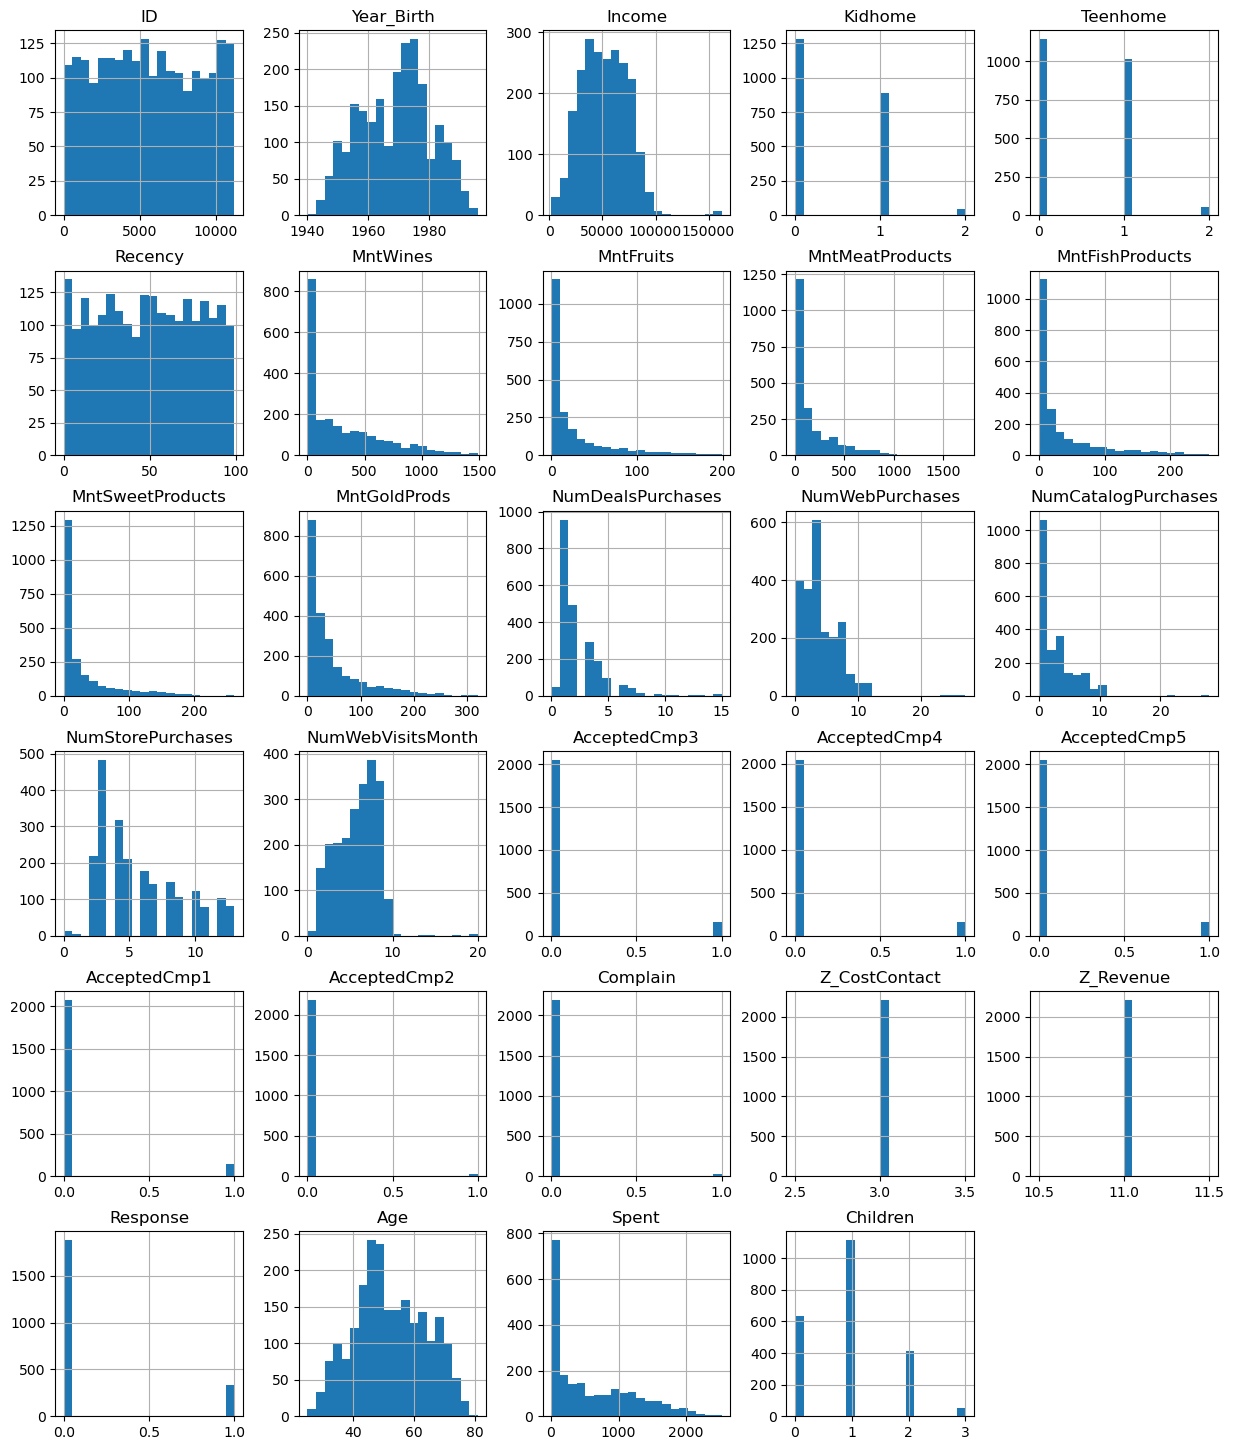

In [38]:
# EXPLORARTORY DATA ANALYSIS (EDA)

# Visualize the data
# Histograms for numerical columns
data_cleaned.hist(bins=20, figsize=(15, 18))
plt.show()

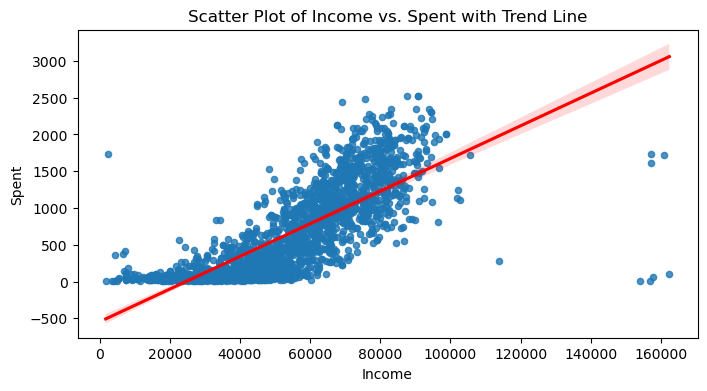

In [54]:
# Create the scatter plot with a regression line
plt.figure(figsize=(8, 4))
sns.regplot(x='Income', y='Spent', data=data_cleaned, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Scatter Plot of Income vs. Spent with Trend Line')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()

In [ ]:
Income and Spent are two numerical features strongly correlated. 
There are some outliers, but I believe it is not necessary to drop them or perform an imputation technique.

Text(0, 0.5, 'Average Spent')

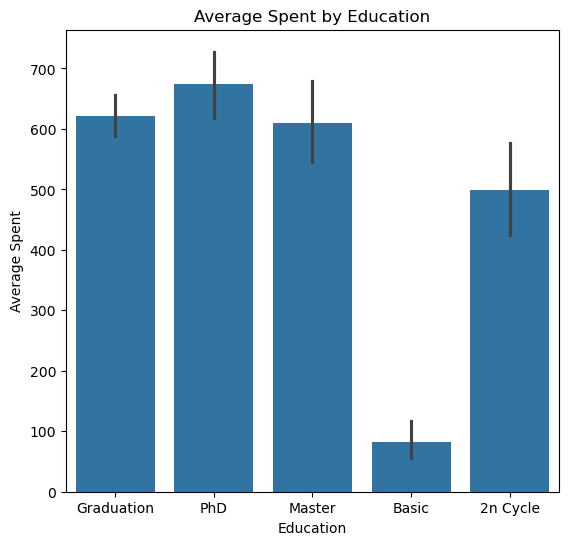

In [61]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))
# First subplot: Average "Spent" by "Education"
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.barplot(x='Education', y='Spent', data=data_cleaned)
plt.title('Average Spent by Education')
plt.xlabel('Education')
plt.ylabel('Average Spent')
